# MLP实现fashion_mnist数据集分类

## 1、查看tensorflow版本

In [1]:
import tensorflow as tf

print('Tensorflow Version:{}'.format(tf.__version__))
print(tf.config.list_physical_devices())

2024-05-02 23:16:49.631210: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow Version:2.16.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## 2、fashion_mnist数据集下载与展示

In [2]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()
print(train_image.shape)
print(train_label.shape)
print(test_image.shape)
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


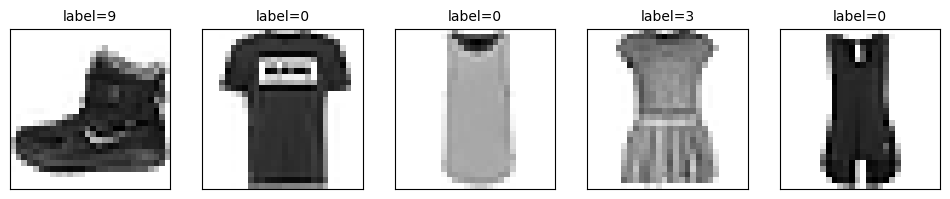

In [3]:
import matplotlib.pyplot as plt
# plt.imshow(train_image[0])  # 此处为啥是彩色的？

def plot_images_lables(images,labels,start_idx,num=5):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    for i in range(num):
        ax = plt.subplot(1,num,1+i)
        ax.imshow(images[start_idx+i],cmap='binary')
        title = 'label=' + str(labels[start_idx+i])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
plot_images_lables(train_image,train_label,0,5)
# plot_images_lables(test_image,test_label,0,5)

## 3、数据预处理

In [4]:
X_train,X_test = tf.cast(train_image/255.0,tf.float32),tf.cast(test_image/255.0,tf.float32) # 归一化
y_train,y_test = train_label,test_label # 此处对y没有做onehot处理，需要使用稀疏交叉损失函数

## 4、模型构建

In [5]:
from keras import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras import Input

model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(units=256,kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=64,kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

## 5、模型配置

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

## 6、模型训练

In [7]:
H = model.fit(x=X_train,
              y=y_train,
              validation_split=0.2,
              # validation_data=(X_test,y_test),
              epochs=10,
              batch_size=128,
              verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.6694 - loss: 0.9388 - val_acc: 0.8422 - val_loss: 0.4471
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8392 - loss: 0.4470 - val_acc: 0.8583 - val_loss: 0.3922
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8599 - loss: 0.3850 - val_acc: 0.8626 - val_loss: 0.3702
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8733 - loss: 0.3549 - val_acc: 0.8696 - val_loss: 0.3523
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8768 - loss: 0.3384 - val_acc: 0.8789 - val_loss: 0.3418
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8828 - loss: 0.3139 - val_acc: 0.8830 - val_loss: 0.3324
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8925 - loss: 0.2934 - val_acc: 0.8868 - val_loss: 0.3218
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8917 - loss: 0.2895 - val_acc: 0.8869 - val_loss: 0.3168
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

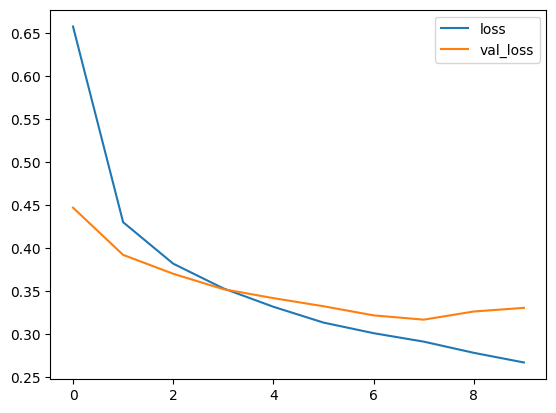

In [8]:
plt.plot(H.epoch, H.history['loss'], label='loss')
plt.plot(H.epoch, H.history['val_loss'], label='val_loss')
plt.legend()

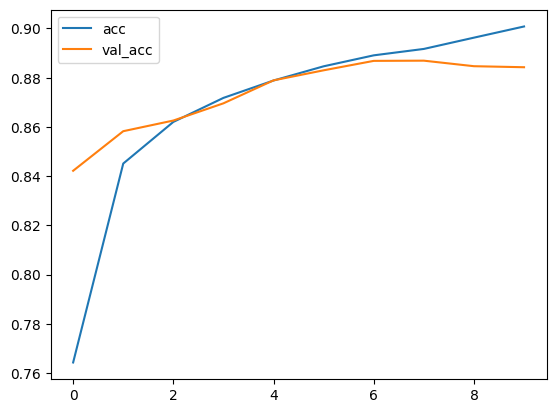

In [9]:
plt.plot(H.epoch, H.history['acc'], label='acc')
plt.plot(H.epoch, H.history['val_acc'], label='val_acc')
plt.legend()

## 7、模型评估

In [10]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8726 - loss: 0.3484


[0.35726097226142883, 0.8711000084877014]

## 8、模型预测

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


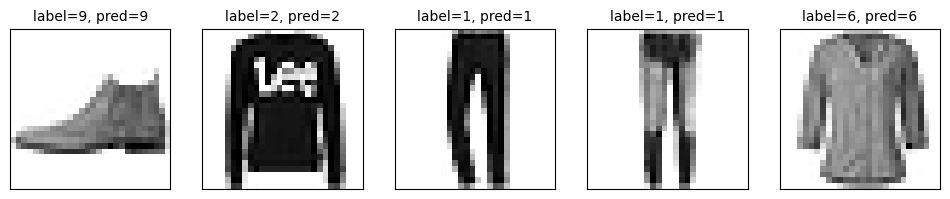

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def pred_plot_images_lables(images,labels,start_idx,num=5):
    # 预测
    res = model.predict(images[start_idx:start_idx+num])
    res = np.argmax(res,axis=1)

    # 画图
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    for i in range(num):
        ax = plt.subplot(1,num,1+i)
        ax.imshow(images[start_idx+i],cmap='binary')
        title = 'label=' + str(labels[start_idx+i]) + ', pred=' + str(res[i])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
pred_plot_images_lables(X_test,y_test,0,5)

## 9、模型保存与加载

In [12]:
import numpy as np

tf.keras.models.save_model(model,"model.keras")
loaded_model = tf.keras.models.load_model("model.keras")
# assert np.allclose(model.predict(X_test[:5]), loaded_model.predict(X_test[:5]))
print(np.argmax(model.predict(X_test[:5]),axis=1))
print(np.argmax(loaded_model.predict(X_test[:5]),axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[9 2 1 1 6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[9 2 1 1 6]
